### Проектная работа
* Темы:
    1. Описательная статистика (статистические характеристики, графики, взаимосвязь величин, дисперсионный и факторный анализ)
    2. Предиктивная аналитика (линейная регрессия, логистическая регрессия)

#### Работа: Оценка зависимости бизнес-результата от своевременности работы с задачами 
Контекст: сотрудники получают задачи с потенциальными сделками. После получения задачи в течение заданного времени сотрудник должен сформировать подзадачи, соответствующие сделкам. Подзадачи должны перейти в статус заключенных или несостоявшихся сделок. Есть признак того, что заданное время было просрочено. Гипотеза – если сотрудник берёт задачи в работу и формирует подзадачи в срок, то его доля заключенных сделок выше.
Признак: доля задач, взятых в работу в срок. Переменная: доля заключенных сделок. Возможно, стоит проверить на зависимость от количества потенциальных сделок - на случай, если «хорошим» сотрудникам поступает больше сделок в работу.
Цель работы – проверить, влияет ли дисциплина (своевременное взятие задач в работу) на результат.

In [239]:
import pandas as pd
import matplotlib.pyplot as plt

##### Загрузка и обработка обезличенного датасета 

In [240]:
df = pd.read_excel("project_dataset.xlsx", sheet_name="Export Worksheet")
df.head()

,ID,BEGIN_DT,END_DT,CREATE_DT,FIRST_ISSUE_CREATE_DT,FIRST_CLOSE_DT,ISSUE_STAGE_NAME,EXPIRED,TB_NAME_ISU,USER_ID,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK
0,25923,21.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,720030,1,0,1,0
1,25722,21.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,3194418,1,0,1,0
2,25787,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,3194418,1,0,1,0
3,25650,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,1266400,1,0,1,0
4,25849,17.10.19,27.09.19,20.09.19,08.10.19,NaN,В работе,Просрочено,Среднерусский банк,1848864,1,0,1,0


In [241]:
def df_info(input_dataframe):
    ''' Определение формы датафрейма. 
    '''
    print(input_dataframe.info())
    return print("Форма: {}\n\nСтолбцы: {}\n\nИндексы: {}\n".format(input_dataframe.shape, 
                                                                      input_dataframe.columns, input_dataframe.index))

df_info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5408 entries, 0 to 5407
Data columns (total 14 columns):
ID                       5408 non-null int64
BEGIN_DT                 5408 non-null object
END_DT                   5408 non-null object
CREATE_DT                5408 non-null object
FIRST_ISSUE_CREATE_DT    3003 non-null object
FIRST_CLOSE_DT           49 non-null object
ISSUE_STAGE_NAME         5408 non-null object
EXPIRED                  5408 non-null object
TB_NAME_ISU              5408 non-null object
USER_ID                  5408 non-null int64
COUNT_SUB_ISSUE          5408 non-null int64
COUNT_DEAL               5408 non-null int64
EXPIRED_MARK             5408 non-null int64
CANCEL_ACCEPT_MARK       5408 non-null int64
dtypes: int64(6), object(8)
memory usage: 591.6+ KB
None
Форма: (5408, 14)

Столбцы: Index(['ID', 'BEGIN_DT', 'END_DT', 'CREATE_DT', 'FIRST_ISSUE_CREATE_DT',
       'FIRST_CLOSE_DT', 'ISSUE_STAGE_NAME', 'EXPIRED', 'TB_NAME_ISU',
       'USER_ID', 'COUNT_SUB

In [242]:
print(df["EXPIRED"].value_counts(), "\n")
print(df["TB_NAME_ISU"].value_counts(), "\n")
print(df["ISSUE_STAGE_NAME"].value_counts(), "\n")
print(df["FIRST_CLOSE_DT"].value_counts(), "\n")

Отказ            2570
Просрочено       1614
Закрыта          1223
Не просрочено       1
Name: EXPIRED, dtype: int64 

Волго-Вятский банк             833
Среднерусский банк             653
Северо-Западный банк           554
Центрально-Черноземный банк    542
Поволжский банк                483
Юго-Западный банк              478
Уральский банк                 459
Сибирский банк                 414
Байкальский банк               386
Московский банк                309
Дальневосточный банк           297
Name: TB_NAME_ISU, dtype: int64 

Отказ        2570
В работе     1360
Закрыта      1223
Загружена     255
Name: ISSUE_STAGE_NAME, dtype: int64 

30.07.19    45
31.07.19     2
29.07.19     2
Name: FIRST_CLOSE_DT, dtype: int64 



In [243]:
# Добавление бинарных признаков
df = df.join(pd.get_dummies(df["EXPIRED"], prefix = "EXPIRED"))
df = df.join(pd.get_dummies(df["ISSUE_STAGE_NAME"], prefix = "ISSUE_STAGE_NAME"))
df = df.drop(['ID', 'BEGIN_DT', 'END_DT', 'CREATE_DT', 'FIRST_ISSUE_CREATE_DT',
       'FIRST_CLOSE_DT', 'ISSUE_STAGE_NAME', 'EXPIRED'], axis = 1)
df.head()

,TB_NAME_ISU,USER_ID,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,EXPIRED_Закрыта,EXPIRED_Не просрочено,EXPIRED_Отказ,EXPIRED_Просрочено,ISSUE_STAGE_NAME_В работе,ISSUE_STAGE_NAME_Загружена,ISSUE_STAGE_NAME_Закрыта,ISSUE_STAGE_NAME_Отказ
0,Среднерусский банк,720030,1,0,1,0,0,0,0,1,1,0,0,0
1,Среднерусский банк,3194418,1,0,1,0,0,0,0,1,1,0,0,0
2,Среднерусский банк,3194418,1,0,1,0,0,0,0,1,1,0,0,0
3,Среднерусский банк,1266400,1,0,1,0,0,0,0,1,1,0,0,0
4,Среднерусский банк,1848864,1,0,1,0,0,0,0,1,1,0,0,0


In [244]:
# добваить кол-во задач-строк
df_tmp1 = df.groupby(["USER_ID"]).size()
df_tmp2 = df.groupby("USER_ID")['COUNT_SUB_ISSUE',"COUNT_DEAL","EXPIRED_MARK","CANCEL_ACCEPT_MARK"].sum()
df = pd.concat([df_tmp2, df_tmp1 ], axis=1 )
df.rename(columns={df.columns[4]: 'TASK_TOTAL'}, inplace=True)
df.head()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL
USER_ID,,,,,
213380,59,25,7,19,108
236084,15,3,1,0,18
249998,15,0,2,16,49
250106,32,1,7,21,78
256624,46,7,9,2,73


In [245]:
# Доля заключенных сделок 
df["DEAL_RATIO"] = df["COUNT_DEAL"] / df["COUNT_SUB_ISSUE"]

In [246]:
df.head()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO
USER_ID,,,,,,
213380,59,25,7,19,108,0.423729
236084,15,3,1,0,18,0.200000
249998,15,0,2,16,49,0.000000
250106,32,1,7,21,78,0.031250
256624,46,7,9,2,73,0.152174


In [247]:
# Доля задач, отработанных вовремя
df["INTIME_RATIO"] = 1 - df["EXPIRED_MARK"] / df["TASK_TOTAL"]
df.head()

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO,INTIME_RATIO
USER_ID,,,,,,,
213380,59,25,7,19,108,0.423729,0.935185
236084,15,3,1,0,18,0.200000,0.944444
249998,15,0,2,16,49,0.000000,0.959184
250106,32,1,7,21,78,0.031250,0.910256
256624,46,7,9,2,73,0.152174,0.876712


In [262]:
#df1 = df.sort_values(["DEAL_RATIO","INTIME_RATIO"])

Text(0, 0.5, 'INTIME_RATIO')

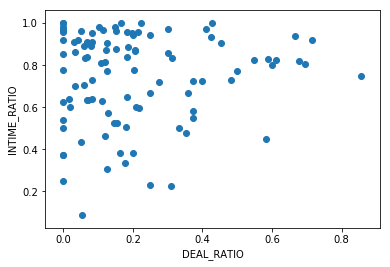

In [263]:
plt.scatter(df["DEAL_RATIO"],df["INTIME_RATIO"])
plt.xlabel("DEAL_RATIO")
plt.ylabel("INTIME_RATIO")

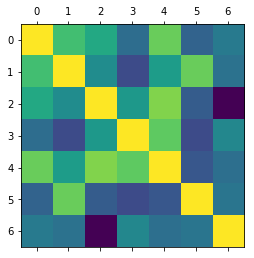

,COUNT_SUB_ISSUE,COUNT_DEAL,EXPIRED_MARK,CANCEL_ACCEPT_MARK,TASK_TOTAL,DEAL_RATIO,INTIME_RATIO
COUNT_SUB_ISSUE,1,0.538549,0.393604,0.0189606,0.652598,-0.0369973,0.103357
COUNT_DEAL,0.538549,1,0.216275,-0.174095,0.320359,0.65362,0.0509489
EXPIRED_MARK,0.393604,0.216275,1,0.288604,0.711706,-0.0783041,-0.523567
CANCEL_ACCEPT_MARK,0.0189606,-0.174095,0.288604,1,0.620441,-0.175473,0.180241
TASK_TOTAL,0.652598,0.320359,0.711706,0.620441,1,-0.109234,0.030058
DEAL_RATIO,-0.0369973,0.65362,-0.0783041,-0.175473,-0.109234,1,0.0685705
INTIME_RATIO,0.103357,0.0509489,-0.523567,0.180241,0.030058,0.0685705,1


In [258]:
X_corr = df.corr()
plt.matshow(X_corr)
plt.show()
X_corr.style.background_gradient(cmap='coolwarm')